#Objetivo

Utilizar técnicas de clasificación para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

Dataset: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset



##Descripción del Dataset:

Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10.



#1. Carga y Exploración de Datos:

- Cargar el dataset y revisar su estructura básica.
- Describir las variables y su distribución.
- Identificar y tratar valores nulos y outliers.

In [ ]:
# Importacion de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Carga de datos
df = pd.read_csv("/content/WineQT.csv")

In [ ]:
# Imprime todos los tipos de datos de las variables del df
print("Tipos de datos de las variables:")
display(df.dtypes)

Tipos de datos de las variables:


,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [ ]:
# Imprime las primeras filas del df
print("Primeras filas del conjunto de datos:")
display(df.head())

Primeras filas del conjunto de datos:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
# Imprime valores outliers
# df.shape[0] número de filas y df.shape[1] número de columnas
print(f"El conjunto de datos tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")
print("Resumen estadístico de las características numéricas:")
# df.describe() para calcular estadísticas descriptivas com la media, desviación estándar, valores mínimo y máximo, y percentiles para cada columna numérica.
display(df.describe())

El conjunto de datos tiene 1143 filas y 13 columnas.

Resumen estadístico de las características numéricas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Definir límites de detección
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Ver cantidad de outliers por variable
outliers = ((df < limite_inferior) | (df > limite_superior)).sum()
print("Cantidad de outliers por variable:")
print(outliers)

Cantidad de outliers por variable:
fixed acidity            44
volatile acidity         14
citric acid               1
residual sugar          110
chlorides                77
free sulfur dioxide      18
total sulfur dioxide     40
density                  36
pH                       20
sulphates                43
alcohol                  12
quality                  22
Id                        0
dtype: int64


In [ ]:
# Imprime todos los valores nulos por columna del df
# df.isnull() devuelve un DataFrame booleano donde los valores nulos son marcados como True.
# .sum() cuenta la cantidad de valores True (nulos) en cada columna.
print("Cantidad de valores nulos por columna:")
display(df.isnull().sum())

Cantidad de valores nulos por columna:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Imprime la cantidad de valores únicos en cada columna del DataFrame.
print("Cantidad de valores únicos por columna:")
display(df.nunique())

Cantidad de valores únicos por columna:


,0
fixed acidity,91
volatile acidity,135
citric acid,77
residual sugar,80
chlorides,131
free sulfur dioxide,53
total sulfur dioxide,138
density,388
pH,87
sulphates,89


**Visualización Valores Nulos**

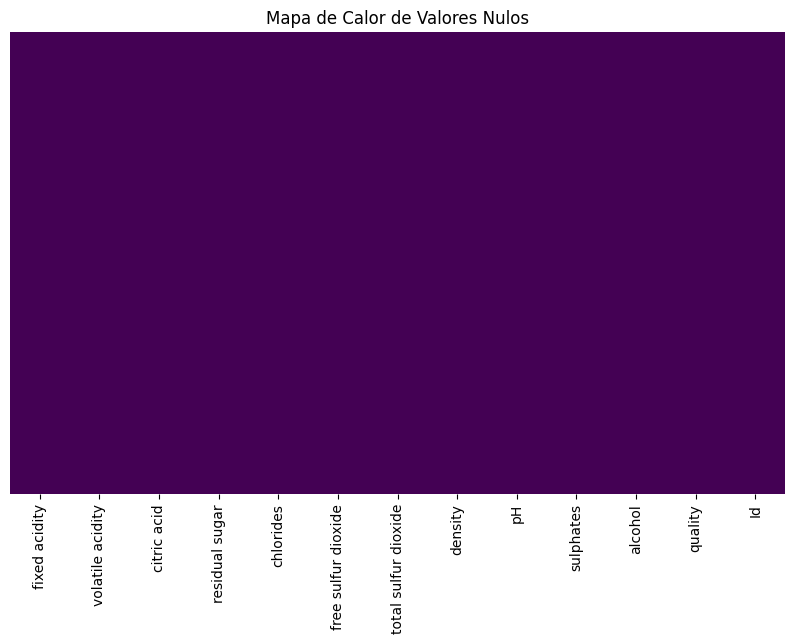

In [ ]:
# Visualizar los valores nulos en el df con un mapa de calor.
plt.figure(figsize=(10, 6))
# yticklabels=False elimina las etiquetas del eje Y para mayor claridad.
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Mapa de Calor de Valores Nulos")
plt.show()

**Visualización de Distribuciones**

<Figure size 1000x600 with 0 Axes>

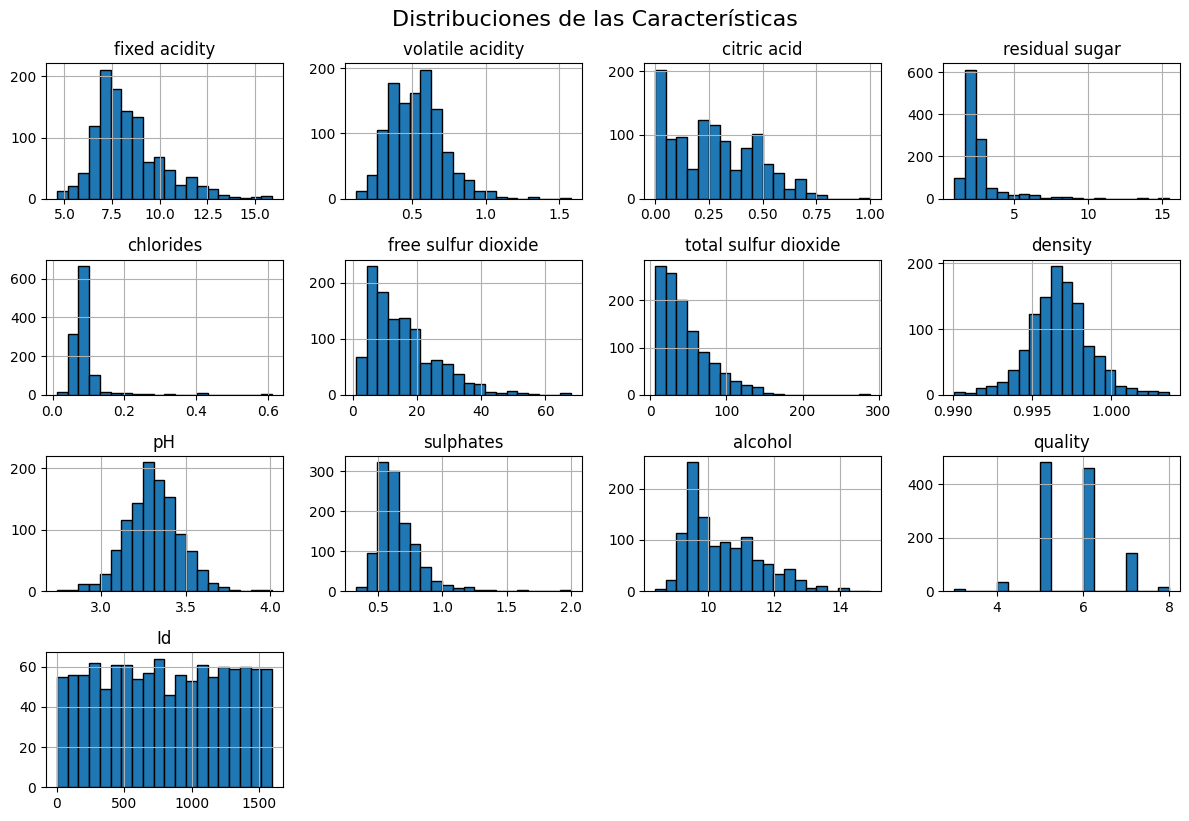

In [ ]:
# Visualizar las distribuciones de las características numéricas principales del df
plt.figure(figsize=(10, 6))
# Generar histogramas para cada columna numérica del DataFrame:
df.hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.tight_layout()
plt.suptitle("Distribuciones de las Características", fontsize=16, y=1.02)
plt.show()

#2. Preprocesamiento de Datos:

**Mapa de calor**

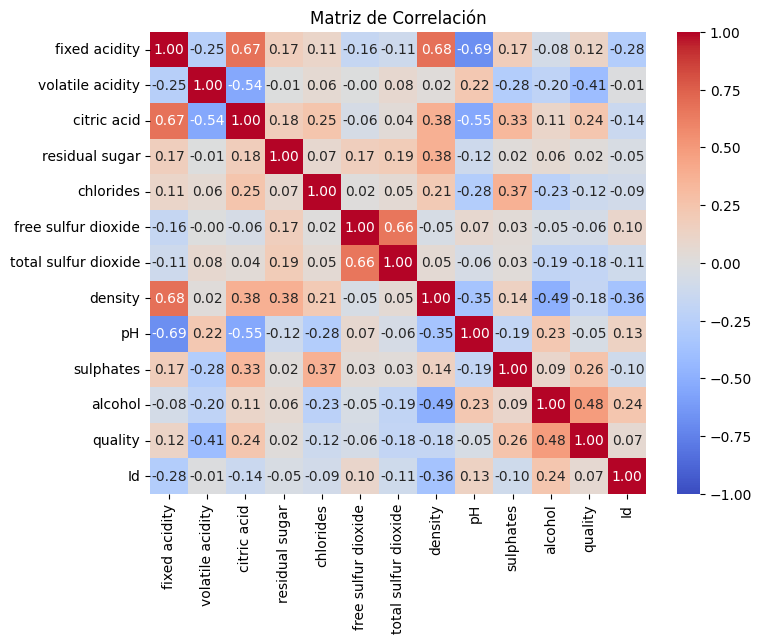

In [ ]:
# Calcular la matriz de correlación del df, para ver la relacion lineal entre variables numericas
correlation = df.corr()
# Visualizar la matriz de correlación como un mapa de calor.
plt.figure(figsize=(8, 6))
# Generar el mapa de calor utilizando Seaborn:
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

Dado el mapa de calor podemos concluir que las variables que tienen una mayor correlacion con la calidad del vino serian:

- Alcohol

- Sulfatos - Sulphates

- Ácido cítrico-Citric acid

#3. Entrenamiento de Modelos de Clasificación:

In [ ]:
# Importar las librerías
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Seleccionar las características y la variable objetivo
X = df[['alcohol', 'sulphates', 'citric acid']]
y = df['quality']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar los modelos
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Validación cruzada para cada modelo
print("Resultados de validación cruzada:")
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name}: Precisión promedio = {np.mean(scores):.4f}")

# Optimización de hiperparámetros para KNN
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print(f"Mejor número de vecinos para KNN: {grid_search.best_params_['n_neighbors']}")

Resultados de validación cruzada:
KNN: Precisión promedio = 0.5295
Random Forest: Precisión promedio = 0.5973
Logistic Regression: Precisión promedio = 0.5678
Mejor número de vecinos para KNN: 9


#4. Evaluación de Modelos:

Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.


KNN - Evaluación del Modelo:
Exactitud: 0.6070
Precisión: 0.6091
Recall: 0.6070
F1-Score: 0.5836

KNN - Probabilidades de Predicción:
[[0.  0.2 0.2 0.4 0.2 0. ]
 [0.  0.  0.4 0.6 0.  0. ]
 [0.  0.  0.8 0.2 0.  0. ]
 [0.  0.  0.6 0.2 0.2 0. ]
 [0.  0.  0.  0.2 0.8 0. ]]


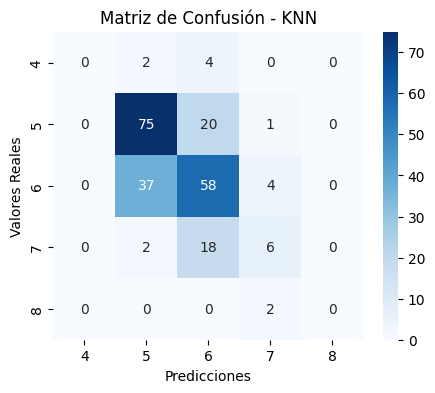


Random Forest - Evaluación del Modelo:
Exactitud: 0.6070
Precisión: 0.6091
Recall: 0.6070
F1-Score: 0.5836

Random Forest - Probabilidades de Predicción:
[[0.         0.32       0.38333333 0.26666667 0.03       0.        ]
 [0.         0.01       0.17       0.81       0.01       0.        ]
 [0.         0.         0.82       0.18       0.         0.        ]
 [0.02       0.01       0.62       0.26       0.07       0.02      ]
 [0.         0.         0.12       0.23       0.64       0.01      ]]


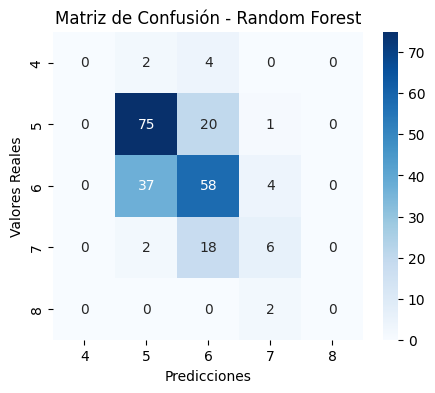


Logistic Regression - Evaluación del Modelo:
Exactitud: 0.6070
Precisión: 0.6091
Recall: 0.6070
F1-Score: 0.5836

Logistic Regression - Probabilidades de Predicción:
[[0.01027816 0.04978927 0.63845902 0.28730934 0.0134997  0.0006645 ]
 [0.00699798 0.03247617 0.64476175 0.29429326 0.02026533 0.00120551]
 [0.01080539 0.04463928 0.49358936 0.40937244 0.03917006 0.00242347]
 [0.00159993 0.00973211 0.46424451 0.38937685 0.12119751 0.0138491 ]
 [0.00071602 0.00850266 0.08523196 0.44085539 0.40740139 0.05729258]]


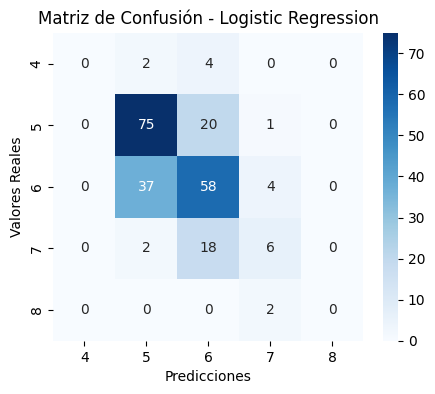

In [ ]:
# Importar librerías
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Nuevo diccionario 'best_models' donde cada modelo está entrenado y listo para hacer predicciones
best_models = {
    "KNN": KNeighborsClassifier().fit(X_train_scaled, y_train), # Fit the model
    "Random Forest": RandomForestClassifier().fit(X_train_scaled, y_train), # Fit the model
    "Logistic Regression": LogisticRegression().fit(X_train_scaled, y_train) # Fit the model
}

# Evaluar cada modelo con las métricas requeridas
for name, model in best_models.items():
    y_probs = model.predict_proba(X_test_scaled)

    # Calcular métricas con zero_division=1 para evitar problemas de etiquetas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    cm = confusion_matrix(y_test, y_pred)

    # Mostrar resultados
    print(f"\n{name} - Evaluación del Modelo:")
    print(f"Exactitud: {accuracy:.4f}")
    print(f"Precisión: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"\n{name} - Probabilidades de Predicción:")
    print(y_probs[:5])  # Mostrar las primeras 5 predicciones


    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()

Generar un informe de clasificación para cada modelo.

In [ ]:
# Importar librería
from sklearn.metrics import classification_report

# Generar y mostrar el informe de clasificación para cada modelo
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)

    # Generar informe de clasificación
    report = classification_report(y_test, y_pred, zero_division=1)

    print(f"\n{name} - Informe de Clasificación:")
    print(report)



KNN - Informe de Clasificación:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.62      0.73      0.67        96
           6       0.55      0.55      0.55        99
           7       0.40      0.23      0.29        26
           8       1.00      0.00      0.00         2

    accuracy                           0.57       229
   macro avg       0.51      0.30      0.30       229
weighted avg       0.55      0.57      0.55       229


Random Forest - Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      1.00      0.00         0
           4       1.00      0.00      0.00         6
           5       0.66      0.70      0.68        96
           6       0.60      0.60      0.60        99
           7       0.61      0.65      0.63        26
           8       1.00      0.00      0.00         2

    accuracy                           0.62       229
 

Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


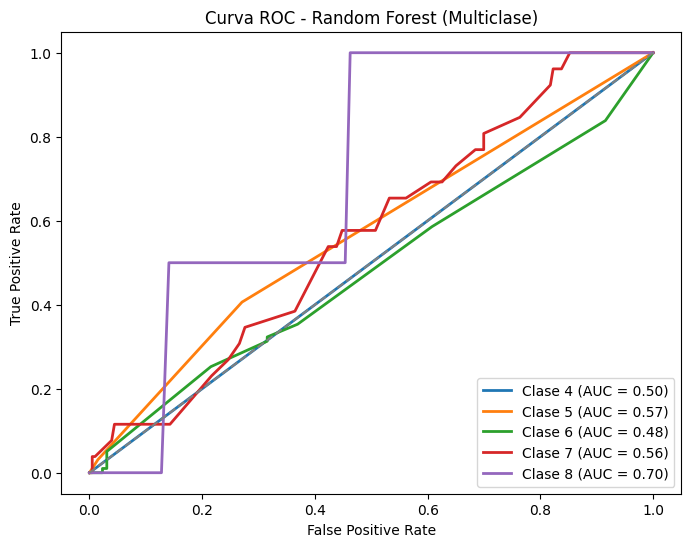

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Obtener las etiquetas reales (con todas las instancias)
y_true = y_test.values

# Obtener las probabilidades de predicción de Random Forest
y_scores = best_models["Random Forest"].predict_proba(X_test)

# Binarizar las etiquetas reales para multiclase
classes = np.unique(y_test)
y_true_bin = label_binarize(y_true, classes=classes)

# Graficamos la curva ROC por cada clase
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Clase {classes[i]} (AUC = {roc_auc:.2f})')

# Línea base
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest (Multiclase)")
plt.legend(loc="lower right")
plt.show()


#5. Análisis y Comparación de Resultados:

- KNN (0.5295) es el menos preciso.
- Random Forest tiene la mejor precisión promedio (0.5973).
- Logistic Regression (0.5678) está detrás de Random Forest, lo que quiere decir es, que puede capturar algunas estructuras útiles en los datos.

Si el objetivo es maximizar precisión, Random Forest es la mejor opción porque aprovecha la potencia de múltiples árboles de decisión para mejorar la capacidad de generalización y reducir el sobreajuste.

Como conclusion, Random Forest es mejor por su capacidad para manejar relaciones no lineales y alta variabilidad en los datos. Cabe recalcar que, Logistic Regression es eficiente cuando los datos tienen una relación lineal entre las características y finalmente, KNN es más dependiente del número de vecinos.